## Torch helper

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# # Example of target with class indices
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randint(5, (3,), dtype=torch.int64)
# loss = F.cross_entropy(input, target)
# loss.backward()

# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = F.cross_entropy(input, target)
loss.backward()

In [32]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [34]:
output

tensor([[0.3184, 0.5187, 0.1629],
        [0.1729, 0.3803, 0.4468]])

In [33]:
input

tensor([[ 0.4528,  0.9407, -0.2173],
        [-0.7126,  0.0754,  0.2365]])

In [35]:
target

tensor([[0.0902, 0.0469, 0.3807, 0.2519, 0.2302],
        [0.2238, 0.0231, 0.1703, 0.4697, 0.1130],
        [0.1024, 0.0231, 0.0521, 0.1747, 0.6477]])

## Data exploration

In [115]:
df = pd.read_csv(path2imgs, header=None)

In [146]:
l = d[0:4][1]
idx = l[0]*13 + l[1]

In [145]:
idx.shape

torch.Size([])

In [147]:
l[:,0]*13 + l[:,1]

tensor([160,  57, 152,  50])

In [127]:
idx

tensor([160,  57])

In [63]:
a = df[(df.iloc[:, 170] <= df.iloc[:, 169]+1) & (df.iloc[:, 170] >= df.iloc[:, 169]-1)]

In [116]:
df.groupby([169,170]).count()

0     1     2     3     4     5     6     7     8     9    ...  \
169 170                                                              ...   
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  ...   
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  ...   
    2    1085  1085  1085  1085  1085  1085  1085  1085  1085  1085  ...   
    3    1117  1117  1117  1117  1117  1117  1117  1117  1117  1117  ...   
    4    1224  1224  1224  1224  1224  1224  1224  1224  1224  1224  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
12  8    1251  1251  1251  1251  1251  1251  1251  1251  1251  1251  ...   
    9    1174  1174  1174  1174  1174  1174  1174  1174  1174  1174  ...   
    10   1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  ...   
    11   1154  1154  1154  1154  1154  1154  1154  1154  1154  1154  ...   
    12   1132  1132  1132  1132  1132  1132  1132  1132  1132  1132  ...   

          159   160   161   162   163   164   165   166   167   168  
169 170                                                              
0   0    1206  1206  1206  1206  1206  1206  1206  1206  1206  1206  
    1    1212  1212  1212  1212  1212  1212  1212  1212  1212  1212  
    2    1085  1085  1085  1085  1085  1085  1085  1085  1085  1085  
    3    1117  1117  1117  1117  1117  1117  1117  1117  1117  1117  
    4    1224  1224  1224  1224  1224  1224  1224  1224  1224  1224  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
12  8    1251  1251  1251  1251  1251  1251  1251  1251  1251  1251  
    9    1174  1174  1174  1174  1174  1174  1174  1174  1174  1174  
    10   1168  1168  1168  1168  1168  1168  1168  1168  1168  1168  
    11   1154  1154  1154  1154  1154  1154  1154  1154  1154  1154  
    12   1132  1132  1132  1132  1132  1132  1132  1132  1132  1132  

[169 rows x 169 columns]

In [42]:
df[(df.iloc[:,170]>6) & (df.iloc[:,169]>6)]

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
12,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,0,1,10,9
29,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,0,0,8,12
34,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,11,11
38,1,0,1,0,1,1,0,0,0,0,...,1,1,1,1,1,0,0,0,7,11
41,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,0,0,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99876,1,1,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,0,0,7,12
99894,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,10,12
99916,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,12,11
99917,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,11,9


In [ ]:
plt.imshow(df.iloc[2, :-2].values.reshape(13,13))

## Tensorboard


In [ ]:
%load_ext tensorboard

## Trained model

In [1]:
import yaml
import torch
import pandas as pd 
from dataset import MazeDataset
from models.beta_vae import BetaVAE
from models.beta_vae_MLP import BetaVAE_MLP
from models.beta_vae_CLF import BetaVAE_CLF

def read_config(config_file):
    with open(config_file, 'r') as file:
        try:
            config = yaml.safe_load(file)
        except yaml.YAMLError as exc:
            print(exc)
    return config

config_file = 'logs/BetaVAE_MLP_BiasedL90R10_1Corridor/bbvae_MLP.yaml'
#config_file = 'configs/bbvae_CLF.yaml'
ckpt_version = 16

config = read_config(config_file)
model_type = config['model_params']['name']
ckpt = f'logs/{model_type}/version_{ckpt_version}/checkpoints/last.ckpt'
# ckpt = 'logs/BetaVAE_BottomBiasL1000R100_2Corridors/version_6/checkpoints/last.ckpt'

# load dataset
path2imgs = config['data_params']['data_path']
imgs = pd.read_csv(path2imgs, header=None).values
d = MazeDataset(imgs, config["data_params"]["num_labels"])

# load pytorch model checkpoint from file
models = {'BetaVAE': BetaVAE, 'BetaVAE_MLP': BetaVAE_MLP, 'BetaVAE_CLF': BetaVAE_CLF}
model = models[model_type](**config['model_params'])
state = torch.load(ckpt)['state_dict']
# remove 'model.' prefix from state dict keys
state = {k[6:]: v for k, v in state.items()} 
model.load_state_dict(state, strict=0) 
model = model.eval()

idx :  41078
tensor([[3.7530]], dtype=torch.float64)


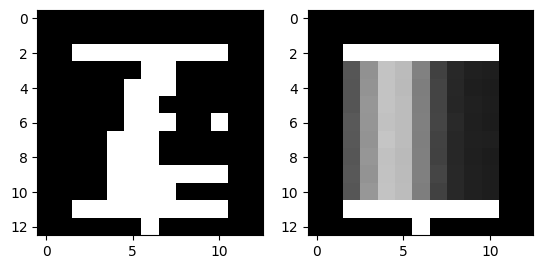

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import random

model.eval()

idx = 99916#11384
#idx = random.choice(range(90000,100000))
idx = random.choice(range(len(d)-15000, len(d)))
print(f'idx :  {idx}')

# use this with mazes
in_ = d[idx:idx+1][0]
labels = d[idx:idx+1][1]
print(labels)
#in_rec = model.generate(in_.reshape(-1,169)).reshape(13,13).detach().numpy() # for BVAE_MLP
in_rec = model.generate(in_, labels=labels).squeeze().detach().numpy() # for BVAE

# use this with mnist
# in_ = d[idx][0]
# in_rec = model.generate(in_.reshape(1,*in_.shape)).squeeze().detach().numpy()

in_rec_thrd = np.where(in_rec > 0.5, 1, 0)
fig, axs = plt.subplots(1,2)
axs[0].imshow(in_.squeeze().detach().numpy(), cmap='binary')
axs[1].imshow(in_rec, cmap='binary')
fig.show()

In [33]:
true_l = model.map_label2idx(labels)
print(true_l)

tensor([69])


In [36]:
mu, log_var = model.encode(in_)
z = model.reparameterize(mu, log_var)
pred = model.classify(z).squeeze().detach().numpy()
pred[true_l]

1.0

In [35]:
np.argmax(pred)

69

In [46]:
data = d[185000:]
true_l = model.map_label2idx(data[1]).detach().numpy()
mu, log_var = model.encode(data[0])
z = model.reparameterize(mu, log_var)
pred = model.classify(z).squeeze().detach().numpy()
pred = np.argmax(pred, axis=1)

In [59]:
c = 0
for i in range(len(pred)):
    if true_l[i] -1 <= pred[i] <= true_l[i] +1:
        c+=1


In [60]:
c

6293

In [61]:
sum(true_l == pred)

3005

### Traversals of latent channels

In [44]:
import random

idx = random.randint(0, d.__len__()-1)
in_ = d[idx:idx+1][0]

mu, log_var = model.encode(in_)
z = model.reparameterize(mu, log_var)

In [45]:
import io
import imageio

def modified_savefig(fig,dpi):
    with io.BytesIO() as buff:
        fig.savefig(buff, format='raw', dpi=dpi)
        buff.seek(0)
        data = np.frombuffer(buff.getvalue(), dtype=np.uint8)
        img_arr = np.reshape(np.frombuffer(buff.getvalue(), dtype=np.uint8),
                         newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    return img_arr

# Initialize the movie
delta = 4
n_points = 50
fig, axs = plt.subplots(1, z.shape[1], figsize=(3*z.shape[1],3))
fig.tight_layout()

# Update the frames for the movie
rows = []

for c, i in enumerate(np.linspace(-delta,delta,n_points)):
    for latent_channel in range(z.shape[1]):
        z_ = torch.zeros_like(z)
        z_[:,latent_channel] = i
        #z_[:,0] = 1
        #z_[:,3] = j
        rec = model.decode(z_)
        _ = axs[latent_channel].imshow(rec.squeeze().detach().numpy(), cmap='binary')
    plt.close()
    rows.append(modified_savefig(fig, 100))

imageio.mimsave(f'tmp/test.mp4', rows, fps=5)

from IPython.display import Video
Video("tmp/test.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 300) to (1504, 304) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [ ]:
import numpy as np
import time

#z = z_.clone()

delta = 3
n_points = 35
#latent_channel = 4

fig, axs = plt.subplots(n_points, z.shape[1], figsize=(3*z.shape[1],2*n_points))

for latent_channel in range(z.shape[1]):
    for c, i in enumerate(np.linspace(-delta,delta,n_points)):
        z_ = torch.zeros_like(z)
        z_[:,latent_channel] = i
        #z_[:,0] = 1
        #z_[:,3] = j
        rec = model.decode(z_)
        axs[c,latent_channel].imshow(rec.squeeze().detach().numpy(), cmap='binary')
    
plt.show()

### Latent space

In [13]:
X, y = d[70000:]
#X, y = d[195000:]
#X, y = d[125000:145000]

#y, int2y = y2label(y)

with torch.no_grad():
    mu, log_var = model.encode(X)
    Z = model.reparameterize(mu, log_var)

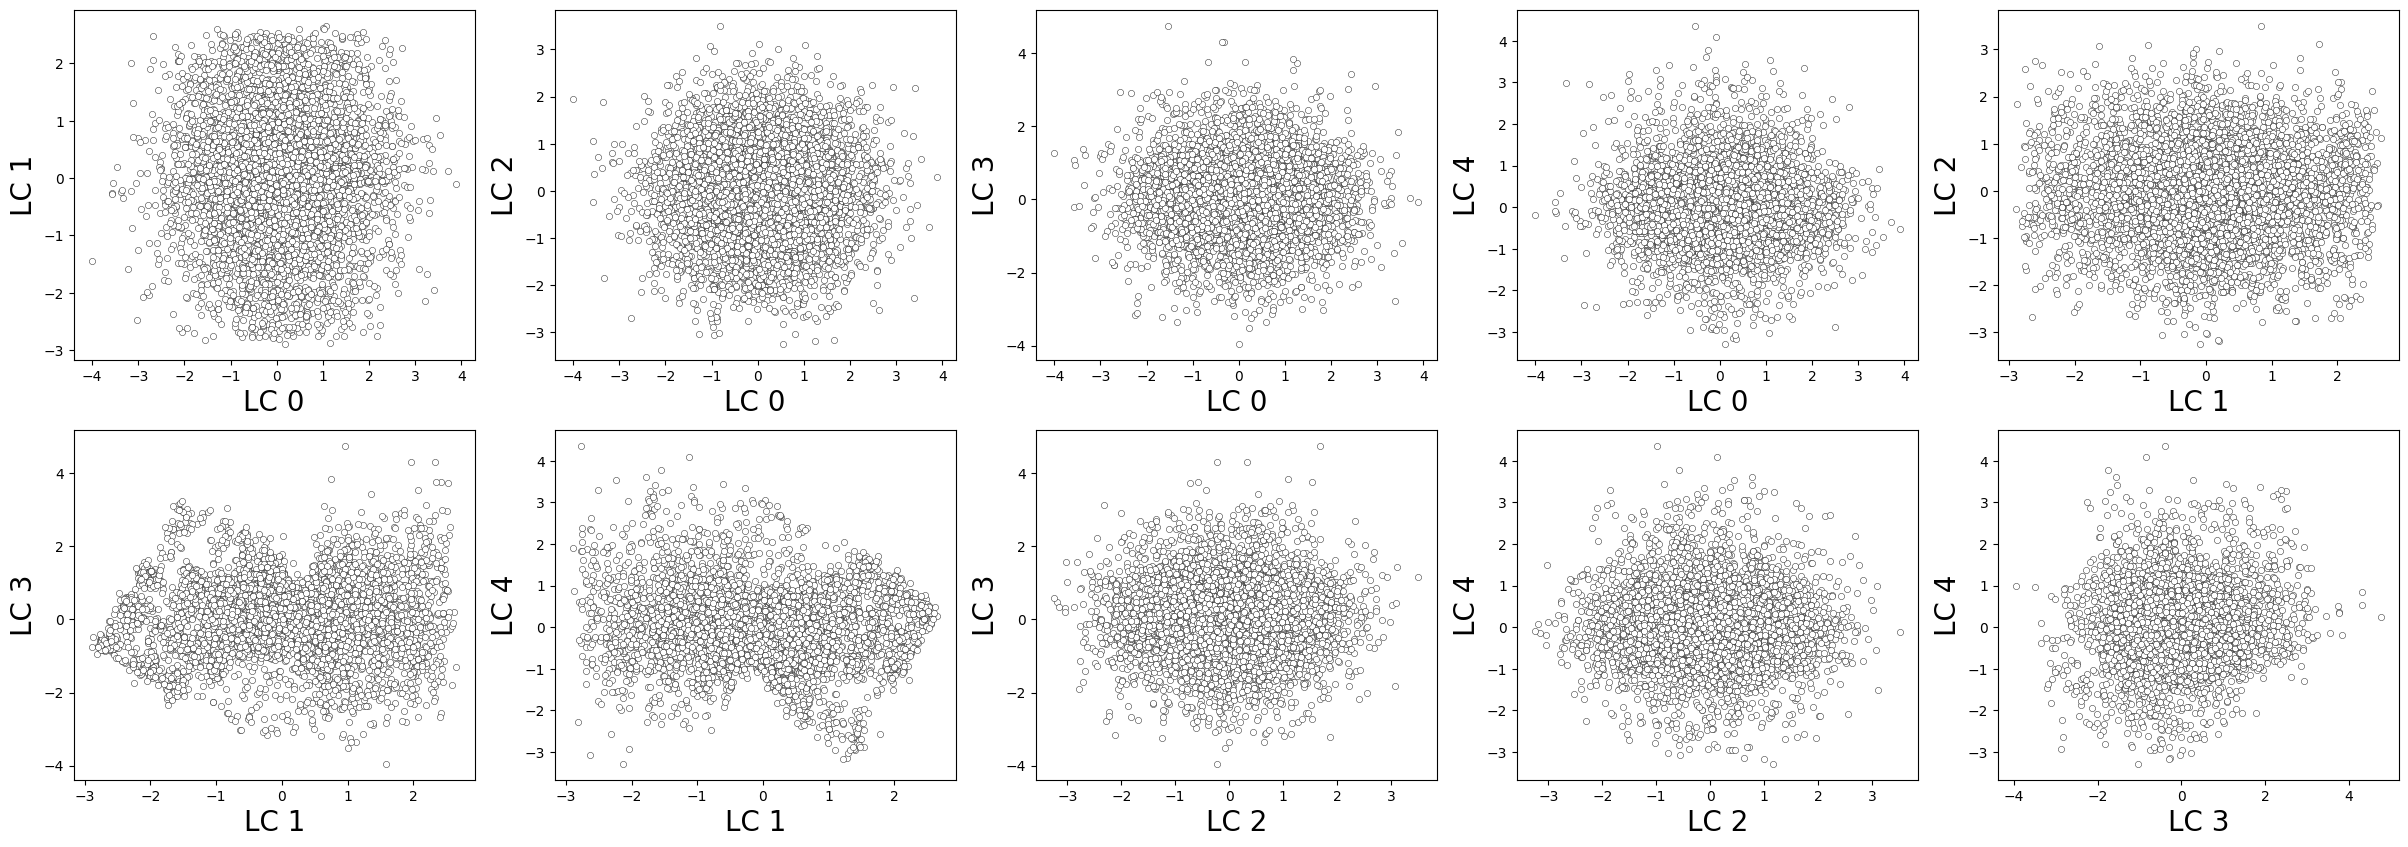

In [14]:
import matplotlib.pyplot as plt
from itertools import combinations


fig, axs = plt.subplots(2, 5, figsize=(30,10))
axs = axs.flatten()
for pairidx, pair in enumerate(list(combinations(range(5), 2))):
    # We only take the two corresponding features
    X_ = Z[:, pair]
    ax = axs[pairidx]
    ax.scatter(
        X_[:, 0], 
        X_[:, 1],
        c='w',
        edgecolor="black",
        linewidth=.3,
        s=20,
    )
    ax.set_xlabel(f"LC {pair[0]}", fontsize=20)
    ax.set_ylabel(f"LC {pair[1]}", fontsize=20)